In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

/home/arda/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
median_house_hold_in_come = pd.read_csv('MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")

In [6]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [7]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [11]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10       128
        ... 
76.7       1
59.9       1
50.7       1
72.4       1
58.5       1
Name: poverty_rate, Length: 771, dtype: int64

In [12]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'], 0.0, inplace = True) 
# '-' degerlerini 0.0 ile degistir

In [13]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
# datadaki sayi degerleri object(yani string) oldugu icin onlari float yapiyoruz

In [14]:
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
# datadaki unique(tekrarladan sadece bir tabe deger alan)eyaletleri liste seklinde bir degiskene atiyoruz

In [15]:
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i] #filter
    area_poverty_rate = sum(x.poverty_rate)/len(x) # Average
    area_poverty_ratio.append(area_poverty_rate)

In [16]:
data = pd.DataFrame({'area_list': area_list, 'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values # Yeni index olusturuyor( kucukten buyuge)
sorted_data = data.reindex(new_index) # datanin index ini yeni indexe gore siraliyor

Text(0.5, 1.0, 'Povery Rate for Given State')

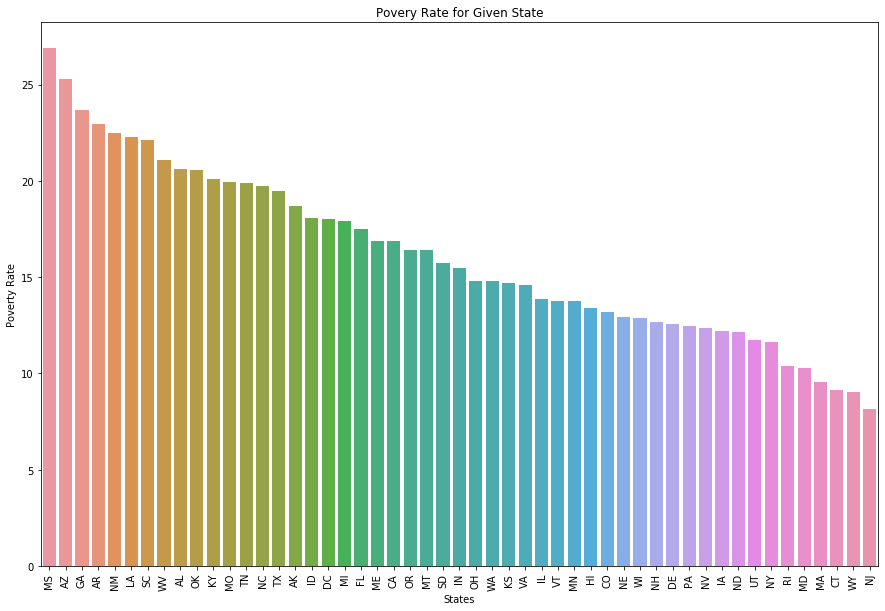

In [18]:
plt.figure(figsize = (15, 10))
sns.barplot(x = sorted_data['area_list'], y = sorted_data['area_poverty_ratio'])
plt.xticks(rotation = 90) # x axis deki isimleri 90 derece yana yatiriyor
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title('Povery Rate for Given State')